## R was the de-facto language of bioinformatics.

I said "was", yet you will find many applications are written in R. Therefore learning to run it would help us a great deal to understand how to use these mapping/quantification tools. We would follow the first steps given in
https://colab.research.google.com/github/c-mertes/RNAseq-ASHG19/blob/master/colab_notebooks/Getting_Started_with_Colab_and_R.ipynb

## Setup R environment

In [1]:
download.file("https://raw.githubusercontent.com/c-mertes/RNAseq-ASHG19/master/r-env-setup-script.R", "r-env-setup-script.R")
source("r-env-setup-script.R")

Update and install needed Ubuntu packages

Download R package cache

Unzipping R package cache

Warning message in system("tar -xzf r_binaries.tar.gz -C / ", intern = TRUE):
“running command 'tar -xzf r_binaries.tar.gz -C / ' had status 2”
Retrieve data for tutorials



In [2]:
if(!requireNamespace("BiocManager", quietly=TRUE))
    install.packages("BiocManager")

In [3]:
BiocManager::install("tximport")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.2 (2023-10-31)

Installing package(s) 'tximport'

Old packages: 'bit', 'curl', 'devtools', 'gargle', 'highr', 'isoband',
  'openssl', 'ragg', 'textshaping', 'whisker', 'xfun', 'zip', 'boot', 'nlme'



In [4]:
BiocManager::install("GenomicFeatures")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.2 (2023-10-31)

Installing package(s) 'GenomicFeatures'

also installing the dependencies ‘SparseArray’, ‘futile.logger’, ‘S4Arrays’, ‘DelayedArray’, ‘BiocParallel’, ‘Rhtslib’, ‘SummarizedExperiment’, ‘KEGGREST’, ‘Rsamtools’, ‘GenomicAlignments’, ‘restfulr’, ‘BiocFileCache’, ‘S4Vectors’, ‘IRanges’, ‘GenomeInfoDb’, ‘GenomicRanges’, ‘AnnotationDbi’, ‘RSQLite’, ‘RCurl’, ‘XVector’, ‘Biostrings’, ‘BiocIO’, ‘rtracklayer’, ‘biomaRt’


Old packages: 'bit', 'curl', 'devtools', 'gargle', 'highr', 'isoband',
  'openssl', 'ragg', 'textshaping', 'whisker', 'xfun', 'zip', 'boot', 'nlme'



In [ ]:
library(tximport)
library(GenomicFeatures)
library(readr)

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomeInfoDb

Loading required package: GenomicRanges

Loa

In [ ]:
downloadGDriveFile <- function(id, out){
    system(paste0(
        'wget --continue --load-cookies /tmp/cookies.txt ',
            '"https://docs.google.com/uc?export=download&confirm=$(wget ',
            '--quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate ',
            "'https://docs.google.com/uc?export=download&id=", id, "' -O- | ",
            "sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\\1\\n/p')&id=", id, '" ',
            "-O ", out, " && rm -rf /tmp/cookies.txt"), intern=TRUE)
}

In [ ]:
downloadGDriveFile(out = "quant.zip", id = "1dlUJQ-JU7E58vzY0aMSjo5FugLabUHnX")

character(0)

In [ ]:
system("unzip quant.zip")

In [ ]:
txdb <- makeTxDbFromGFF("chr22_genes.gtf")
k <- keys(txdb, keytype = "GENEID")
tx2gene <- select(txdb, keys = k, keytype = "GENEID", columns = "TXNAME")
head(tx2gene)

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
“The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored.”
OK

'select()' returned 1:many mapping between keys and columns



,GENEID,TXNAME
,<chr>,<chr>
1,ENSG00000008735,ENST00000399912
2,ENSG00000008735,ENST00000329492
3,ENSG00000008735,ENST00000341339
4,ENSG00000008735,ENST00000442429
5,ENSG00000008735,ENST00000008876
6,ENSG00000008735,ENST00000399908


In [ ]:
samples <- read.table("samples.txt", header = TRUE)
files <- file.path("quant", samples$sample, "quant.sf")
names(files) <- paste0(samples$sample)
txi.salmon <- tximport(files, type = "salmon", tx2gene = tx2gene)

reading in files with read_tsv

1 
2 
3 
4 
5 
6 


removing duplicated transcript rows from tx2gene

transcripts missing from tx2gene: 4443

summarizing abundance

summarizing counts

summarizing length



In [ ]:
head(txi.salmon$counts)

,HBR_Rep1,HBR_Rep2,HBR_Rep3,UHR_Rep1,UHR_Rep2,UHR_Rep3
DQ459412,0,0,0,0,0,0
DQ459413,47,78,57,128,65,101
DQ459415,0,0,0,0,0,0
DQ459418,1,7,5,1,3,3
DQ459419,2,0,0,6,8,5
DQ459420,0,0,0,0,0,1


In [ ]:
dim(txi.salmon$counts)

[1] 92  6

In [ ]:
rownames(txi.salmon$counts)

[1] "DQ459412" "DQ459413" "DQ459415" "DQ459418" "DQ459419" "DQ459420"
 [7] "DQ459421" "DQ459422" "DQ459424" "DQ459425" "DQ459426" "DQ459427"
[13] "DQ459429" "DQ459430" "DQ459431" "DQ516731" "DQ516739" "DQ516740"
[19] "DQ516742" "DQ516748" "DQ516750" "DQ516752" "DQ516754" "DQ516758"
[25] "DQ516759" "DQ516763" "DQ516773" "DQ516776" "DQ516777" "DQ516778"
[31] "DQ516779" "DQ516780" "DQ516782" "DQ516783" "DQ516784" "DQ516785"
[37] "DQ516786" "DQ516787" "DQ516790" "DQ516791" "DQ516795" "DQ516796"
[43] "DQ516815" "DQ668356" "DQ668358" "DQ668359" "DQ668362" "DQ668363"
[49] "DQ668364" "DQ668365" "DQ668366" "DQ668367" "DQ839618" "DQ854991"
[55] "DQ854992" "DQ854993" "DQ854994" "DQ854995" "DQ854997" "DQ854998"
[61] "DQ855000" "DQ855001" "DQ855003" "DQ855004" "DQ875385" "DQ875386"
[67] "DQ875387" "DQ883642" "DQ883643" "DQ883646" "DQ883650" "DQ883651"
[73] "DQ883652" "DQ883653" "DQ883654" "DQ883656" "DQ883658" "DQ883659"
[79] "DQ883661" "DQ883663" "DQ883664" "DQ883669" "DQ883670" "DQ883671"
[85] "DQ883673" "DQ883682" "DQ883685" "DQ883689" "EF011062" "EF011063"
[91] "EF011069" "EF011072"

In [ ]:
BiocManager::install("DESeq2")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.2 (2023-10-31)

Installing package(s) 'DESeq2'

also installing the dependencies ‘locfit’, ‘Rcpp’, ‘RcppArmadillo’


Old packages: 'bit', 'curl', 'devtools', 'gargle', 'highr', 'isoband',
  'openssl', 'ragg', 'textshaping', 'whisker', 'xfun', 'zip', 'boot', 'nlme'



In [ ]:
library(DESeq2)

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following objects are masked from ‘package:Biobase’:

    anyMissing, rowMedians



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumEx

In [ ]:
dds <- DESeqDataSetFromTximport(txi.salmon, samples, ~condition)
dds <- DESeq(dds)
res <- results(dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
using counts and average transcript lengths from tximport

estimating size factors

using 'avgTxLength' from assays(dds), correcting for library size

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [ ]:
summary(res)


out of 78 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 18, 23%
LFC < 0 (down)     : 13, 17%
outliers [1]       : 0, 0%
low counts [2]     : 26, 33%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



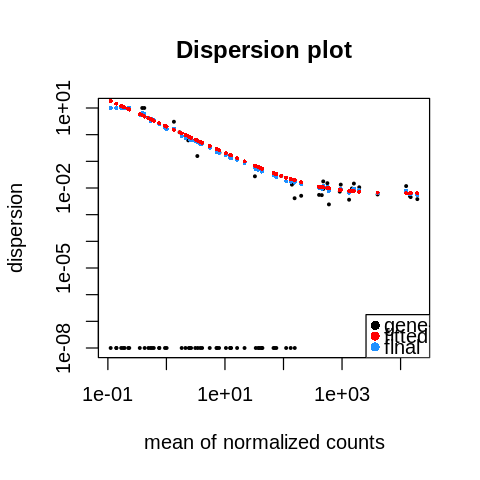

In [ ]:
plotDispEsts(dds, main="Dispersion plot")

In [ ]:
head(data.frame(res))

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DQ459412,0.0000000,NA,NA,NA,NA,NA
DQ459413,75.3931107,0.2563901,0.2346895,1.0924651,0.27462874,0.33210917
DQ459415,0.0000000,NA,NA,NA,NA,NA
DQ459418,3.4257121,-1.1676426,1.0860221,-1.0751554,0.28230514,0.33363335
DQ459419,3.3739761,2.8262531,1.3682837,2.0655461,0.03887136,0.07486335
DQ459420,0.1396156,0.5478995,4.0804729,0.1342735,0.89318628,NA


In [ ]:
rawCounts <- read.delim("http://genomedata.org/gen-viz-workshop/intro_to_deseq2/tutorial/E-GEOD-50760-raw-counts.tsv")
head(rawCounts)